In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

### Load and Understand Our Data

Due to runtime problem, final runs for turn in only uses 20 EPOCHS

In [2]:
EPOCHS = 20
BATCH_SIZE = 32

epochs_range = range(EPOCHS)

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print("X Train shape:", x_train.shape)
print(x_train[0][0][0])
print("Looks like we need to convert in between (0,1) by divide elements by 255 \n")
print("Y Train shape:", y_train.shape)
print(np.unique(y_train))
print("Looks like we have 10 unique classes for our data")

X Train shape: (50000, 32, 32, 3)
[59 62 63]
Looks like we need to convert in between (0,1) by divide elements by 255 

Y Train shape: (50000, 1)
[0 1 2 3 4 5 6 7 8 9]
Looks like we have 10 unique classes for our data


In [5]:
# Convert RGB to decimal in between [0,1] => 255 = 1, 0 = 0
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten our target dataset
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [6]:
# Get number of target classes
k_class = len(np.unique(y_train))
print("Number of Classes:", k_class)

Number of Classes: 10


In [7]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(horizontal_flip=True,
                                    vertical_flip=True,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1)



train_generator = data_generator.flow(x_train, y_train, BATCH_SIZE)
val_generator = data_generator.flow(x_test, y_test)

steps_per_epoch = x_train.shape[0] // BATCH_SIZE

In [8]:
def plot_acc_and_loss(acc, val_acc, loss, val_loss, epochs_range, condition):
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title("Training and Validation Loss")
    plt.suptitle(condition)
    plt.savefig('./{}.png' .format(condition))
    plt.show()

In [9]:
def get_history(fitted_model):
    acc = fitted_model.history['accuracy']
    avg_acc = np.mean(acc)
    val_acc = fitted_model.history['val_accuracy']
    avg_valAcc = np.mean(val_acc)

    loss = fitted_model.history['loss']
    avg_loss = np.mean(loss)
    val_loss = fitted_model.history['val_loss']
    avg_val_loss = np.mean(val_loss)

    print("Average Training accuracy: {:.2f}%".format(avg_acc*100))
    print("Average Validation accuracy: {:.2f}%".format(avg_valAcc*100))
    print("Average Loss: {:.2f}".format(avg_loss))
    print("Average Validation Loss: {:.2f}".format(avg_val_loss))

    return acc, val_acc, loss, val_loss

## Model 1

Basic 3 CNN layers with Maxpooling

In [10]:
# Get input dimension
input_dimension = x_train[0].shape

# Input layer
inputs = Input(shape=input_dimension)

# Convolution layers
x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

# Fully connected layer
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(k_class, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856 

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

### Model 1.1
This experiment ONLY has rescaling, does NOT use Image Augmentation. This is to check out what our learning look like without any improvement. 

In [13]:
model_1_1 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS)

Epoch 1/20
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3680 - accuracy: 0.5036 - val_loss: 1.0281 - val_accuracy: 0.6339
Epoch 2/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9165 - accuracy: 0.6778 - val_loss: 0.8836 - val_accuracy: 0.6890
Epoch 3/20
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7313 - accuracy: 0.7420 - val_loss: 0.8081 - val_accuracy: 0.7166
Epoch 4/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5977 - accuracy: 0.7873 - val_loss: 0.7720 - val_accuracy: 0.7403
Epoch 5/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4758 - accuracy: 0.8337 - val_loss: 0.7792 - val_accuracy: 0.7459
Epoch 6/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.3554 - accuracy: 0.8742 - val_loss: 0.8519 - val_accuracy: 0.7387
Epoch 7/20
1563/1563 [==============================] - 72s 46ms/step - loss: 0.2623 - accuracy: 0.9070 - val_loss: 0.9843 -

Average Training accuracy: 89.30%
Average Validation accuracy: 72.62%
Average Loss: 0.30
Average Validation Loss: 1.37


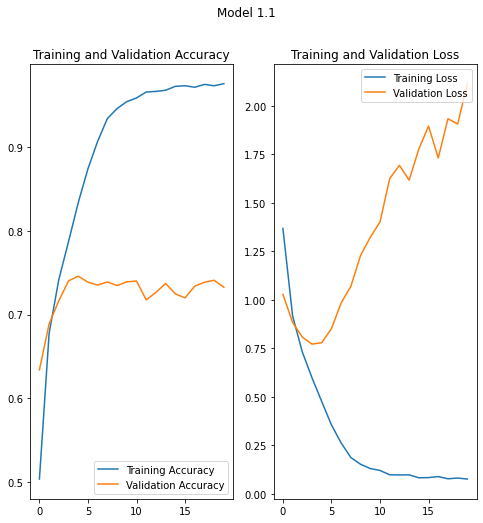

In [14]:
acc, val_acc, loss, val_loss = get_history(model_1_1)

plot_acc_and_loss(acc, val_acc, loss, val_loss, epochs_range, "Model 1.1")

### Model 1.2
This experiment uses MODEL 1 and add in Image Augmentation. This is to test if Image Augmentation helps improve our model. 

In [15]:
model_1_2 = model.fit(train_generator, 
                         validation_data=val_generator, 
                         steps_per_epoch=steps_per_epoch,
                         epochs=EPOCHS)

Epoch 1/20
1562/1562 [==============================] - 74s 47ms/step - loss: 1.2676 - accuracy: 0.5708 - val_loss: 1.1567 - val_accuracy: 0.5961
Epoch 2/20
1562/1562 [==============================] - 74s 47ms/step - loss: 1.0214 - accuracy: 0.6417 - val_loss: 1.0515 - val_accuracy: 0.6302
Epoch 3/20
1562/1562 [==============================] - 74s 47ms/step - loss: 0.9485 - accuracy: 0.6671 - val_loss: 1.0262 - val_accuracy: 0.6423
Epoch 4/20
1562/1562 [==============================] - 75s 48ms/step - loss: 0.8949 - accuracy: 0.6870 - val_loss: 0.9641 - val_accuracy: 0.6700
Epoch 5/20
1562/1562 [==============================] - 73s 47ms/step - loss: 0.8665 - accuracy: 0.6998 - val_loss: 0.9137 - val_accuracy: 0.6820
Epoch 6/20
1562/1562 [==============================] - 73s 47ms/step - loss: 0.8294 - accuracy: 0.7068 - val_loss: 0.9109 - val_accuracy: 0.6880
Epoch 7/20
1562/1562 [==============================] - 76s 49ms/step - loss: 0.7987 - accuracy: 0.7193 - val_loss: 0.9273 -

Average Training accuracy: 72.56%
Average Validation accuracy: 69.57%
Average Loss: 0.79
Average Validation Loss: 0.89


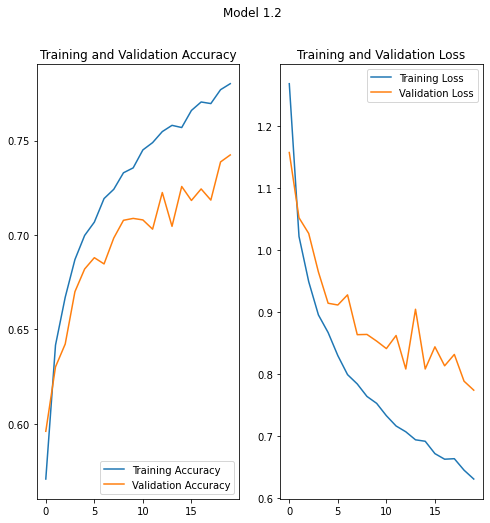

In [16]:
acc_1, val_acc_1, loss_1, val_loss_1 = get_history(model_1_2)

plot_acc_and_loss(acc_1, val_acc_1, loss_1, val_loss_1, epochs_range, "Model 1.2")

## Model 2
Model 2 is an improvement of Model 1.2 since we can see in Model 1.2, there is an overfitting problem. Here I am adding more layers so we have 6 convolution layers instead of 3. 

In [19]:
# Convolution layers
x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

# Fully connected layer
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(k_class, activation='softmax')(x)

model_2 = Model(inputs=inputs, outputs=x)

model_2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [20]:
fitted_model_2 = model_2.fit(train_generator, 
                         validation_data=val_generator, 
                         steps_per_epoch=steps_per_epoch,
                         epochs=EPOCHS)

Epoch 1/20
1562/1562 [==============================] - 155s 98ms/step - loss: 1.7140 - accuracy: 0.3587 - val_loss: 1.4502 - val_accuracy: 0.4641
Epoch 2/20
1562/1562 [==============================] - 156s 100ms/step - loss: 1.3445 - accuracy: 0.5089 - val_loss: 1.3904 - val_accuracy: 0.4973
Epoch 3/20
1562/1562 [==============================] - 155s 99ms/step - loss: 1.1918 - accuracy: 0.5699 - val_loss: 1.1482 - val_accuracy: 0.5804
Epoch 4/20
1562/1562 [==============================] - 155s 99ms/step - loss: 1.0913 - accuracy: 0.6085 - val_loss: 1.0606 - val_accuracy: 0.6147
Epoch 5/20
1562/1562 [==============================] - 155s 99ms/step - loss: 1.0205 - accuracy: 0.6366 - val_loss: 1.0373 - val_accuracy: 0.6366
Epoch 6/20
1562/1562 [==============================] - 154s 99ms/step - loss: 0.9662 - accuracy: 0.6566 - val_loss: 0.9664 - val_accuracy: 0.6579
Epoch 7/20
1562/1562 [==============================] - 154s 99ms/step - loss: 0.9190 - accuracy: 0.6733 - val_loss: 

Average Training accuracy: 67.22%
Average Validation accuracy: 66.49%
Average Loss: 0.92
Average Validation Loss: 0.95


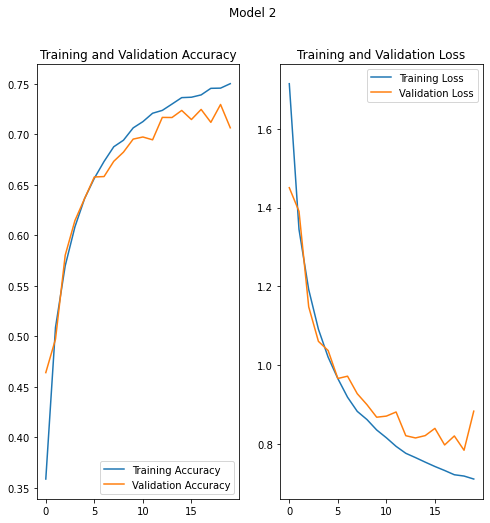

In [21]:
acc_2_1, val_acc_2_1, loss_2_1, val_loss_2_1 = get_history(fitted_model_2)

plot_acc_and_loss(acc_2_1, val_acc_2_1, loss_2_1, val_loss_2_1, epochs_range, "Model 2")

### Model 3
Number of Layers are the same as MODEL 2, but I am adding Dropout layers after Flatten layer and before Output layer. This is to check if our model does less overfitting or not. 

In [10]:
# Get input dimension
input_dimension = x_train[0].shape

# Input layer
inputs = Input(shape=input_dimension)

# Convolution layers
x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

# Fully connected layer
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k_class, activation='softmax')(x)

model_3 = Model(inputs=inputs, outputs=x)

In [11]:
model_3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [12]:
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                             

In [17]:
fitted_model_3 = model_3.fit(train_generator, 
                         validation_data=val_generator, 
                         steps_per_epoch=steps_per_epoch,
                         epochs=EPOCHS)

Epoch 1/20
1562/1562 [==============================] - 159s 102ms/step - loss: 1.7892 - accuracy: 0.3292 - val_loss: 1.5120 - val_accuracy: 0.4369
Epoch 2/20
1562/1562 [==============================] - 161s 103ms/step - loss: 1.4499 - accuracy: 0.4692 - val_loss: 1.3816 - val_accuracy: 0.5044
Epoch 3/20
1562/1562 [==============================] - 163s 104ms/step - loss: 1.2964 - accuracy: 0.5336 - val_loss: 1.2112 - val_accuracy: 0.5636
Epoch 4/20
1562/1562 [==============================] - 160s 102ms/step - loss: 1.2002 - accuracy: 0.5677 - val_loss: 1.1236 - val_accuracy: 0.5977
Epoch 5/20
1562/1562 [==============================] - 155s 100ms/step - loss: 1.1366 - accuracy: 0.5942 - val_loss: 1.0806 - val_accuracy: 0.6111
Epoch 6/20
1562/1562 [==============================] - 157s 101ms/step - loss: 1.0829 - accuracy: 0.6106 - val_loss: 1.0804 - val_accuracy: 0.6090
Epoch 7/20
1562/1562 [==============================] - 158s 101ms/step - loss: 1.0398 - accuracy: 0.6282 - val_

Average Training accuracy: 63.01%
Average Validation accuracy: 64.32%
Average Loss: 1.03
Average Validation Loss: 1.00


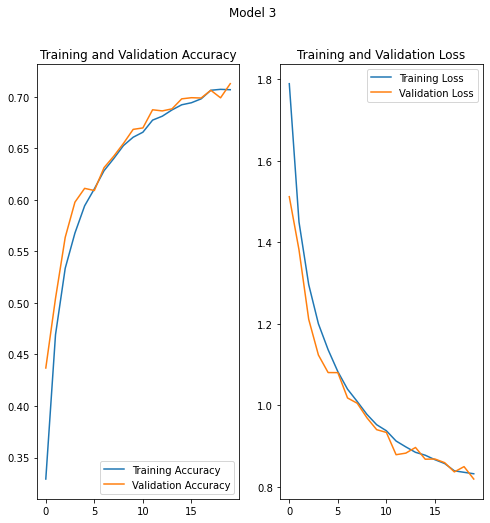

In [18]:
acc_3, val_acc_3, loss_3, val_loss_3 = get_history(fitted_model_2)

plot_acc_and_loss(acc_3, val_acc_3, loss_3, val_loss_3, epochs_range, "Model 3")

In [13]:
fitted_model_3_1 = model_3.fit(train_generator, 
                         validation_data=val_generator, 
                         steps_per_epoch=steps_per_epoch,
                         epochs=50)

Epoch 1/50
1562/1562 [==============================] - 158s 100ms/step - loss: 1.7449 - accuracy: 0.3472 - val_loss: 1.4647 - val_accuracy: 0.4596
Epoch 2/50
1562/1562 [==============================] - 152s 97ms/step - loss: 1.4226 - accuracy: 0.4786 - val_loss: 1.2838 - val_accuracy: 0.5256
Epoch 3/50
1562/1562 [==============================] - 155s 99ms/step - loss: 1.2700 - accuracy: 0.5396 - val_loss: 1.2075 - val_accuracy: 0.5597
Epoch 4/50
1562/1562 [==============================] - 153s 98ms/step - loss: 1.1646 - accuracy: 0.5810 - val_loss: 1.1096 - val_accuracy: 0.6025
Epoch 5/50
1562/1562 [==============================] - 152s 97ms/step - loss: 1.1071 - accuracy: 0.6005 - val_loss: 1.0525 - val_accuracy: 0.6285
Epoch 6/50
1562/1562 [==============================] - 160s 103ms/step - loss: 1.0615 - accuracy: 0.6225 - val_loss: 1.0009 - val_accuracy: 0.6382
Epoch 7/50
1562/1562 [==============================] - 157s 100ms/step - loss: 1.0099 - accuracy: 0.6391 - val_loss

Average Training accuracy: 69.43%
Average Validation accuracy: 70.06%
Average Loss: 0.87
Average Validation Loss: 0.86


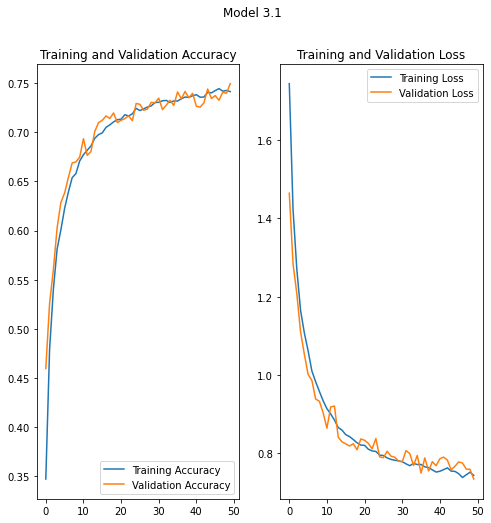

In [15]:
epochs_range = range(50)
acc_3_1, val_acc_3_1, loss_3_1, val_loss_3_1 = get_history(fitted_model_3_1)

plot_acc_and_loss(acc_3_1, val_acc_3_1, loss_3_1, val_loss_3_1, epochs_range, "Model 3.1")